## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

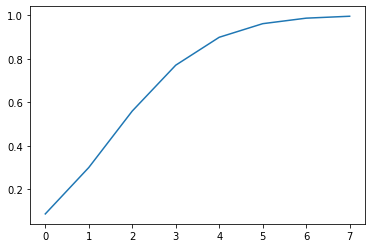

In [1]:
# your answer here

from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#creating an array of values between
#0 to 20 with a difference of 0.01
x = np.arange(0, 8, 1)
y = poisson.cdf(x, 2.435, 0)
   
plt.plot(x, y) 
plt.show()



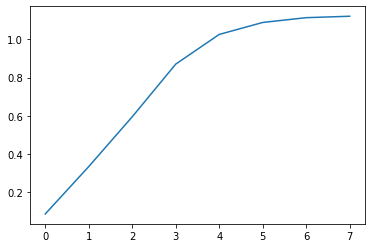

In [2]:
x1 = np.arange(0, 8, 1)
y1 = [35, 134, 238, 348, 410, 435, 445, 448]

def multiply(x):
    return x*0.0025

y2 = list(map(multiply, y1))

plt.plot(x1, y2) 
plt.show()

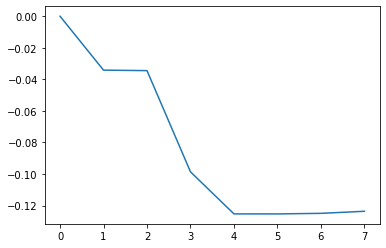

In [3]:
plt.plot(y-y2)
plt.show()

In [4]:
#Success !

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

C:\Users\olivi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


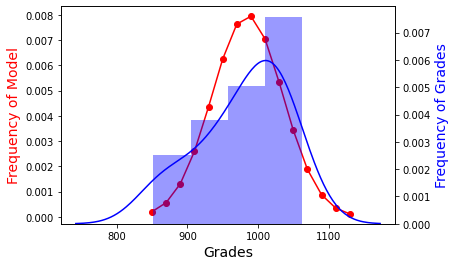

In [5]:
#your answer here

from scipy.stats import norm
import seaborn as sns


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
x = np.arange(850, 1150, 20)
y = norm.pdf(x, 985, 50)
ax.plot(x, y, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Grades",fontsize=14)
# set y-axis label
ax.set_ylabel("Frequency of Model",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
y2 = [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]
sns.distplot(y2,color="blue")
ax2.set_ylabel("Frequency of Grades",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [7]:
# your code here


dct1 = {
    'nb_defects':[0,1,3,4,5],
    'obs_freq': [32,15,9,4,0]
}

data1 = pd.DataFrame(dct1)
data1

,nb_defects,obs_freq
0,0,32
1,1,15
2,3,9
3,4,4
4,5,0


In [8]:
import numpy as np

lst = []

for i in range(len(data1)):
    lst.extend([data1.nb_defects[i]] * data1.obs_freq[i])

sample1 = np.array(lst)

In [9]:
np.mean(sample1)

0.9666666666666667

In [10]:
np.var(sample1)

1.7322222222222228

In [11]:
import scipy.stats as stats 

In [12]:
probs1 = stats.poisson.pmf(data1.nb_defects[0:-1], np.mean(sample1))
exps1 = probs1 * data1.obs_freq.sum()
exps1

array([22.8209254 , 22.06022788,  3.43567623,  0.83028842])

In [13]:
exps1 = np.append(exps1, data1.obs_freq.sum() - np.sum(exps1))
exps1

array([22.8209254 , 22.06022788,  3.43567623,  0.83028842, 10.85288207])

In [14]:
data1.obs_freq.sum() - np.sum(exps1)
data1


,nb_defects,obs_freq
0,0,32
1,1,15
2,3,9
3,4,4
4,5,0


In [18]:
data1['exp_freq'] = exps1
data1

,nb_defects,obs_freq,exp_freq
0,0,32,22.820925
1,1,15,22.060228
2,3,9,3.435676
3,4,4,0.830288
4,5,0,10.852882


In [19]:
pval1 = stats.chisquare(f_obs = data1['obs_freq'], f_exp=data1.exp_freq, ddof=1)[1]
pval1




2.9431706468587253e-08

## Question 4
A quality control engineer takes a simple of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

In [20]:
# your answer here

sample = np.random.binomial(n=10,p=0.05, size=200)
sample

array([0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2,
       0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 1, 0, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0,
       2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1])

## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

In [21]:
#your answer here

dct5 = {
    'physical_activity':['Low','Medium','High'],
    'Yes':[32,14,6],
    'No': [12,22,9]
}

data5 = pd.DataFrame(dct5)
data5 = pd.melt(data5, id_vars=['physical_activity'], value_vars = ['Yes', 'No'], var_name='consume_sugardrinks', value_name='nb')
data5

,physical_activity,consume_sugardrinks,nb
0,Low,Yes,32
1,Medium,Yes,14
2,High,Yes,6
3,Low,No,12
4,Medium,No,22
5,High,No,9


In [22]:
cont_table = pd.crosstab(index=data5.physical_activity, columns = data5.consume_sugardrinks, values = data5.nb, aggfunc = np.sum)
cont_table

consume_sugardrinks,No,Yes
physical_activity,,
High,9,6
Low,12,32
Medium,22,14


In [23]:
chi2, p, dof, expected = stats.chi2_contingency(cont_table)
p

0.004719280137040844

In [ ]:
#p-value < 0.05 ==> we rejet the null hypothesis and conclude there is association between consumption of sugar drinks and physical activity on the sample.